In [1]:
import pandas as pd
import seaborn as sns
from google.colab import files

In [2]:
url_imfp= "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/refs/heads/main/Base%20de%20datos/iMFP-LG/data/MFTP/raw_dataset/AFP.txt"

df= pd.read_csv(url_imfp, header=None, names=["Sequence"], engine="python")
df.to_csv("iMFP-LG.csv", index=False)
df.head()

,Sequence
0,>000000100000000000000
1,AAGMGFFGAR
2,>000000100000000000000
3,AAHGACHVRNGKHMCFCYF
4,>000000100000000000000


In [3]:
df = df.drop(df.index[::2])
df.head()

,Sequence
1,AAGMGFFGAR
3,AAHGACHVRNGKHMCFCYF
5,AAKKSFIIKQKLAKAKNQNRPLPQWFRLKTNNTIRYNAKRRHWRRT...
7,AALKGCWTKSIPPKPCSGKR
9,AALRGCWTKSIPPKPCPGKR


In [4]:
df['label'] = 1
df.head()

,Sequence,label
1,AAGMGFFGAR,1
3,AAHGACHVRNGKHMCFCYF,1
5,AAKKSFIIKQKLAKAKNQNRPLPQWFRLKTNNTIRYNAKRRHWRRT...,1
7,AALKGCWTKSIPPKPCSGKR,1
9,AALRGCWTKSIPPKPCPGKR,1


In [5]:
df.shape

(2324, 2)

### Verificar duplicados

In [6]:
df = df

# 1. Crear el DataFrame que solo contiene las filas con secuencias duplicadas
filas_con_secuencias_duplicadas = df[
    df.duplicated(subset=['Sequence'], keep=False)
].sort_values(by='Sequence') # Ordenamos para que las secuencias repetidas aparezcan juntas

# 2. Imprimir los resultados
if len(filas_con_secuencias_duplicadas) > 0:
    print(f"Se encontraron {len(filas_con_secuencias_duplicadas)} filas con secuencias duplicadas (incluyendo la primera aparición).")
    print("A continuación se muestran las filas duplicadas:")

    # Mostramos las columnas relevantes para la secuencia y actividad
    print(filas_con_secuencias_duplicadas[['Sequence', 'label']].head(20))
else:
    print("¡No se encontraron secuencias duplicadas en tu DataFrame!")

¡No se encontraron secuencias duplicadas en tu DataFrame!


###Verificación de secuencias canónicas






In [9]:
df_sin_duplicados = df.drop_duplicates(subset=['Sequence'], keep='first')
df_sin_duplicados.shape

(2324, 2)

In [10]:
df_sin_duplicados = df_sin_duplicados.copy()
df_sin_duplicados["Sequence"] = df_sin_duplicados["Sequence"].str.strip() #eliminamos los posibles espacios en la secuencia

In [11]:
valid_mask = df_sin_duplicados["Sequence"].str.fullmatch(r"[ACDEFGHIKLMNPQRSTVWY]+", na=False)
invalid_df = df_sin_duplicados[~valid_mask].copy()
invalid_df

,Sequence,label


In [12]:
# Mantener solo secuencias canónicas
filtered = df_sin_duplicados[valid_mask].copy()
filtered.shape

(2324, 2)

In [13]:
df_iMFPLG = filtered
df_iMFPLG.head()

,Sequence,label
1,AAGMGFFGAR,1
3,AAHGACHVRNGKHMCFCYF,1
5,AAKKSFIIKQKLAKAKNQNRPLPQWFRLKTNNTIRYNAKRRHWRRT...,1
7,AALKGCWTKSIPPKPCSGKR,1
9,AALRGCWTKSIPPKPCPGKR,1


### Se evalúa longitud

In [14]:
df_iMFPLG = df_iMFPLG.copy()  # opcional pero limpio
df_iMFPLG["Largo"] = df_iMFPLG["Sequence"].str.len()
df_iMFPLG["Largo"].describe()

,Largo
count,2324.000000
mean,46.583907
std,26.298189
min,5.000000
25%,24.000000
50%,45.000000
75%,64.000000
max,157.000000


<Axes: xlabel='Largo', ylabel='Count'>

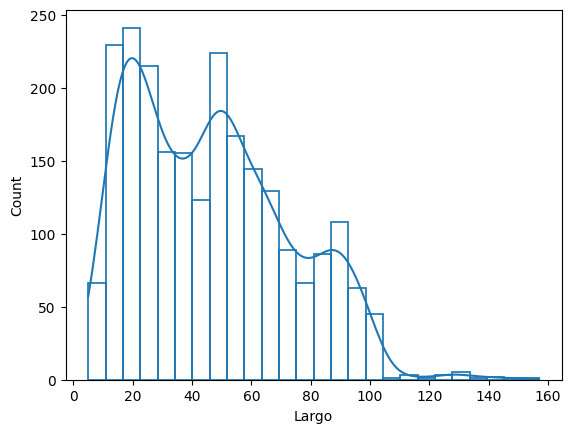

In [16]:
sns.histplot(data=df_iMFPLG, x="Largo", fill=False, kde=True)

In [17]:
df_largo = df_iMFPLG[df_iMFPLG["Largo"] > 100]
df_largo

,Sequence,label,Largo
447,DDTRGGFHGGGFGRPGRPGRPGSGILDTIVDGLTGSIHGGQGGIHG...,1,147
585,DVYKGGGGGRYGGGRYGGGGGYGGGLGGGGLGGGGLGGGKGLGGGG...,1,132
655,ELTEAQRRGLQVALEEFHKHPPVQWAFQETSVESAVDTPFPAGIFV...,1,137
681,ESFLKSKTGYQGVQTLPGFIGGSQPHLGGGIGGGRPFISQPNLGGG...,1,114
1009,FQTSEAILPMASSCCTEVSHHVSGRLLERVSSCSIQRADGDCDLAA...,1,114
1553,GVVLNVNPGKSLEEPAVKHLKVSPVNANEVPVLKELKSVQKTKSGD...,1,143
1879,KESRAKKFQRQHMDSDSSPSSSSTYCNQMMRRRNMTQGRCKPVNTF...,1,128
1959,KPKDMTSSQWFKTQHVQPSPQACNSAMSIINKYTERCKDLNTFLHE...,1,127
1961,KPKGMTSSQWFKIQHMQPSPQACNSAMKNINKHTKRCKDLNTFLHE...,1,128
2051,KTFTRCELVQALRRQGFDEAKLRDWVCLVENESRGRTDIVGKPNKN...,1,121


In [18]:
df_iMFPLG = df_iMFPLG.drop('Largo', axis=1)
df_iMFPLG.head()

,Sequence,label
1,AAGMGFFGAR,1
3,AAHGACHVRNGKHMCFCYF,1
5,AAKKSFIIKQKLAKAKNQNRPLPQWFRLKTNNTIRYNAKRRHWRRT...,1
7,AALKGCWTKSIPPKPCSGKR,1
9,AALRGCWTKSIPPKPCPGKR,1


In [19]:
dataframe_a_descargar = df_iMFPLG
dataframe_a_descargar.to_csv(
    'iMFP-LG.csv',  # Nombre que tendrá el archivo
    index=False                        # Importante: No incluir el índice de filas de Pandas
)
files.download('iMFP-LG.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>